In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

line and magnitude

In [2]:
def line2D(theta,theta0,x,ymin,ymax):
    if theta[1] == 0:
        y = np.linspace(ymin,ymax,len(x))
        x = -np.ones(len(x))*theta0/theta[0]
    else:
        y = - (theta[0]*x+theta0)/theta[1]
    return x,y

def sigmoid(theta,theta0,x):
    # plot a sigmoid based on theta, theta0, and x
    y = 1/(1+np.exp(theta*x+theta0))
    return y

def simp_sigmoid(x):
    return 1/(1+np.exp(-x))

def magnitude(x):
    return np.sqrt(np.sum(x**2))

plotting functions

In [3]:
def plot_data(data,labels):
    # initialize plot
    fig, ax = plt.subplots()

    #solve max and min and set limits
    xmax = np.max(data[0,:])
    xmin = np.min(data[0,:])
    ymax = np.max(data[1,:])
    ymin = np.min(data[1,:])
    ax.set_xlim(xmin-.61*np.abs(xmin),1.61*xmax)
    ax.set_ylim(ymin-.61*np.abs(ymin),1.61*ymax)

    #set color and marker type for plot
    colors = ['b','g','r']
    markers = ['v','+','_']

    #set spines for bold axes
    ax.spines['left'].set_color('black')
    ax.yaxis.tick_left()

    ax.spines['right'].set_color('none')

    ax.spines['bottom'].set_color('black')
    ax.xaxis.tick_bottom()

    ax.spines['top'].set_color('none')

    #set aspect ratio of units equal
    ax.set_aspect('equal')

    #plot the individual markers
    for i,yi in enumerate(labels):
        ax.scatter(data[0,i],data[1,i],color=colors[yi],marker=markers[yi])

    # set the grid
    ax.grid(zorder=-1.0)
    ax.set_axisbelow(True)

    return ax

def plot_sigmoid(theta,theta0,ax):
    #plot a sigmoid in 2D across 1D data

    # get the max and min of the axes
    xmin,xmax = ax.get_xlim()

    # calculate the sigmoid
    x = np.linspace(xmin,xmax,11)
    y = sigmoid(theta,theta0,x)

    #set the ymin and max
    ymax = np.max(y)
    ymin = np.min(y)
    print(ymin)
    print(ymax)
    ax.set_ylim(-1,2)

    #plot the sigmoid
    ax.plot(x,y)

    return ax

def plot_decision(theta,theta0,ax):

    # make the unit vector in the direction of the weights
    unit_theta = theta/magnitude(theta)

    #get the max and min of the axes
    xmin,xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()

    # plot the boundary
    x = np.linspace(xmin,xmax,11)
    x,y = line2D(theta,theta0,x,ymin,ymax)
    ax.plot(x,y)

    # plot the norm to the boundary
    normx = [x[5],unit_theta[0]+x[5]]
    normy = [y[5],unit_theta[1]+y[5]]
    ax.plot(normx,normy)

    return ax

def full_plot(data,labels,theta,theta0):
    #first plot the data
    ax = plot_data(data,labels)

    #plot the boundary
    ax = plot_decision(theta,theta0,ax)

    return ax

def full_sigmoid_plot(data,labels,theta,theta0):
    #first plot the data
    ax = plot_data(data,labels)

    #plot the boundary
    ax = plot_sigmoid(theta,theta0,ax)

    return ax

basic functions

In [4]:
def score(labels, preds):
    # the score returned is the elementwise comparison of two numpy vectors, if
    # all the values are predicted correctly the score should be zero
    return np.sum(labels!=preds)

Linear classifiers

In [5]:
def perceptron(data, labels, epochs,plot=None):
    # initialize th and th0 as 0
    th = np.zeros(np.size(data,axis=0))
    th0 = 0

    # start the algorithim
    for e in range(epochs):
        error = False
        for i in range(np.size(data,axis=1)):
            if labels[i]*(data[:,i].dot(th)+th0) <= 0:
                error = True
                th = th + labels[i]*data[:,i]
                th0 = th0 + labels[i]
                if plot:
                    ax = plot(data,labels,th,th0)
                    plt.show()
                    plt.close()
            else:
                continue
        if error == False:
            break
    return th,th0

Datasets

In [6]:
def simple_1D():
    data = np.array([[3,4,1,2,2.5],
                     [0,0,0,0,0]])
    labels = np.array([1,1,-1,-1,0])
    return  data, labels

def simple_separable():
    data = np.array([[1,1,-1,-1],
                     [1,-1,1,-1]])
    labels = np.array([1,-1,-1,-1])
    return  data, labels

def less_simple():
    # need to change this example to something simpler
    data = np.array([[3,1,2,1,2.5,3,3.5,4],
                     [1.5,2,3,3.5,4,3,4,3]])
    labels = np.array([-1,-1,-1,-1,1,1,1,1])
    return data, labels

def extreme():
    data = np.array([[4.3,3.5,2,1,2,3,3,4],
                     [1.5,2,3,4,3.7,3,3.5,3]])
    labels = np.array([-1,-1,-1,-1,1,1,1,1])
    return data,labels

def not_linear():
    data = np.array([[1,1,-1,-1,-.5],
                     [1,-1,1,-1,-.5]])
    labels = np.array([1,-1,-1,-1,1])
    return  data, labels

Gradient descent stuff

In [132]:
def NLL(x,y,th,th0):
    return y*np.log(simp_sigmoid(th.T.dot(x)+th0))+(1-y)*np.log(simp_sigmoid(th.T.dot(x)+th0))

def NLL_obj(x,y,th,th0):
    return -np.sum(NLL(x,y,th,th0))

def d_NLL_obj_th(x,y,th,th0):
    return np.sum(np.multiply(x,(simp_sigmoid(th.T.dot(x)+th0)-y)),axis=1)

def d_NLL_obj_th0(x,y,th,th0):
    return np.sum(simp_sigmoid(th.T.dot(x)+th0)-y)

def d_NLL_obj(x,y,th,th0):
    return d_NLL_obj_th(x,y,th,th0), d_NLL_obj_th0(x,y,th,th0)

def gd(f, df, th, th0, step_size, max_iter):
    prev_th = th
    prev_th0 = th0
    fs = []; ths = []; th0s = []
    for i in range(max_iter):
        prev_f = f(prev_th,prev_th0)
        prev_thgrad, prev_th0grad = df(prev_th,prev_th0)
        fs.append(prev_f); ths.append(prev_th); th0s.append(prev_th0)
        if i == max_iter-1:
            return prev_th,prev_th0,fs,ths,th0s
        prev_th = prev_th - step_size*prev_thgrad
        prev_th0 = prev_th0 - step_size*prev_th0grad

def NLL_minimize(x,y,step_size):
    th = np.zeros(2).T
    th0 = 0

    def f(th,th0):
        return NLL_obj(x,y,th,th0)

    def df(th,th0):
        return d_NLL_obj(x,y,th,th0)

    th, th0, fs, ths, th0s = gd(f,df,th,th0,step_size,1000)
    return th,th0,fs,ths,th0s

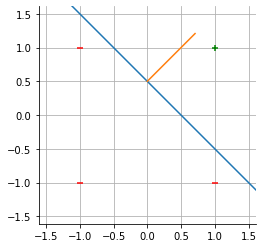

In [133]:
data, labels = simple_separable()
theta = np.array([1,1]).T
theta0 = -.5
ax = full_plot(data,labels,theta,theta0)
plt.savefig('simple_hypothesis.png',bbox_inches='tight',transparent=True,dpi=200)
plt.show()

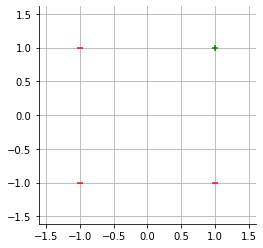

In [134]:
ax = plot_data(data,labels)
plt.savefig('simple_data.png',bbox_inches='tight',transparent=True,dpi=200)
plt.show()

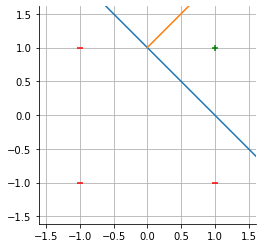

In [135]:
th,th0 = perceptron(data,labels,10)
ax = full_plot(data,labels,th,th0)
plt.savefig('simple_perceptron.png',bbox_inches='tight',transparent=True,dpi=200)
plt.show()

0.014485723997466891
0.999621909949373


<ipython-input-3-23d320c5f31d>:11: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(ymin-.61*np.abs(ymin),1.61*ymax)


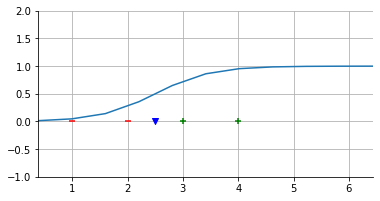

In [136]:
data, labels = simple_1D()
theta =-2
theta0 = 5
ax = full_sigmoid_plot(data,labels,theta,theta0)
plt.savefig('simple_sigmoid.png',bbox_inches='tight',transparent=True,dpi=200)
plt.show()

In [140]:
data, labels = extreme()
labels = np.array([0,0,0,0,1,1,1,1])
th, th0, fs, ths, th0s = NLL_minimize(data,labels,.01)

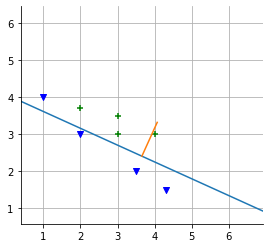

In [138]:
#for i in range(10):
#    ax = full_plot(data,labels,ths[i],th0s[i])
#    plt.show()
ax = full_plot(data,labels,th,th0)
plt.show()

In [139]:
a = np.array([3,4,5])
b = np.array([2,3,4])
print(a*b)

[ 6 12 20]
